# Load and Understand Data

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
data = pd.read_csv("customer_acquisition_data.csv")
data.head()

,customer_id,channel,cost,conversion_rate,revenue
0,1,referral,8.320327,0.123145,4199
1,2,paid advertising,30.450327,0.016341,3410
2,3,email marketing,5.246263,0.043822,3164
3,4,social media,9.546326,0.167592,1520
4,5,referral,8.320327,0.123145,2419


In [16]:
data.describe()

,customer_id,cost,conversion_rate,revenue
count,800.0000,800.000000,800.000000,800.000000
mean,400.5000,13.148052,0.086305,2769.151250
std,231.0844,9.922337,0.059611,1259.543706
min,1.0000,5.246263,0.016341,500.000000
25%,200.7500,5.246263,0.043822,1694.000000
50%,400.5000,8.320327,0.043822,2764.000000
75%,600.2500,9.546326,0.123145,3824.250000
max,800.0000,30.450327,0.167592,4998.000000


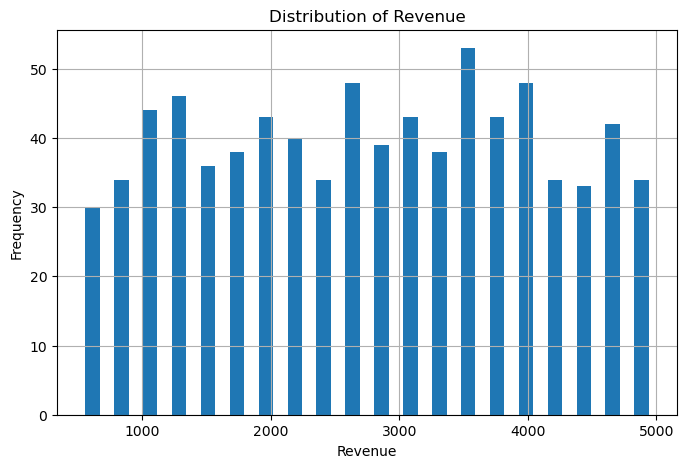

In [25]:
plt.figure(figsize=(8, 5))
plt.hist(data['revenue'], bins=20, rwidth=0.5)
plt.title('Distribution of Revenue')
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

#  Cost of Acquisition

In [20]:
cost_by_channel = data.groupby('channel')['cost'].mean().reset_index()
cost_by_channel

,channel,cost
0,email marketing,5.246263
1,paid advertising,30.450327
2,referral,8.320327
3,social media,9.546326


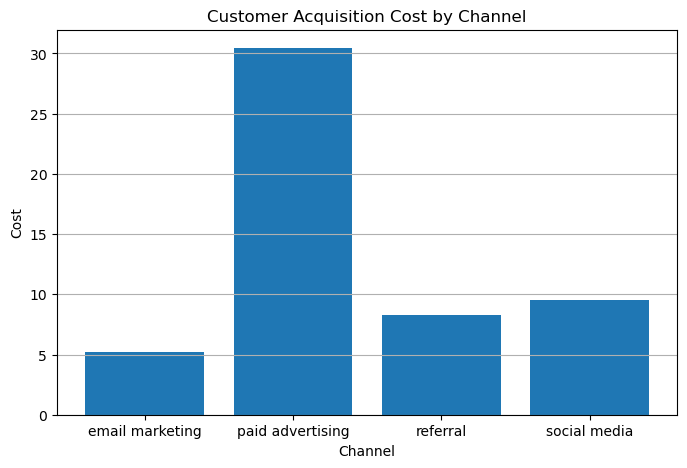

In [24]:
plt.figure(figsize=(8, 5))
plt.bar(cost_by_channel['channel'], cost_by_channel['cost'])
plt.title('Customer Acquisition Cost by Channel')
plt.xlabel('Channel')
plt.ylabel('Cost')
plt.grid(axis='y')
plt.show()

# Conversion Rate per Channel

In [26]:
conversion_by_channel = data.groupby('channel')['conversion_rate'].mean().reset_index()
conversion_by_channel

,channel,conversion_rate
0,email marketing,0.043822
1,paid advertising,0.016341
2,referral,0.123145
3,social media,0.167592


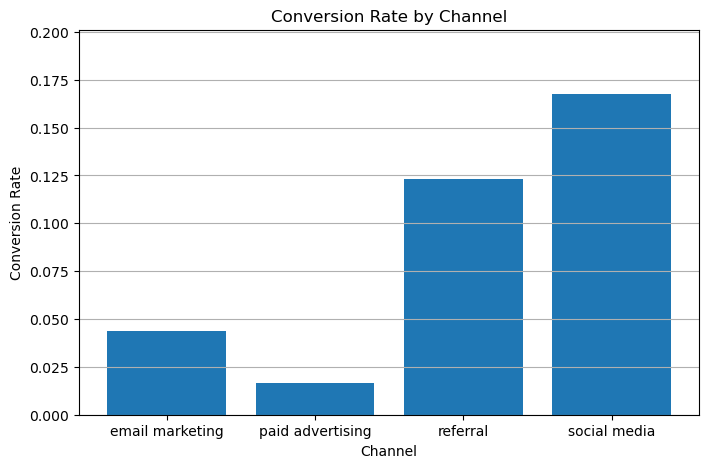

In [28]:
plt.figure(figsize=(8, 5))
plt.bar(conversion_by_channel['channel'], conversion_by_channel['conversion_rate'])
plt.title('Conversion Rate by Channel')
plt.xlabel('Channel')
plt.ylabel('Conversion Rate')
plt.ylim(0, max(conversion_by_channel['conversion_rate']) * 1.2)  # Extend y-axis slightly above the max conversion rate
plt.grid(axis='y')
plt.show()

# Revenue

In [29]:
revenue_by_channel = data.groupby('channel')['revenue'].sum().reset_index()
revenue_by_channel

,channel,revenue
0,email marketing,604706
1,paid advertising,548396
2,referral,569552
3,social media,492667


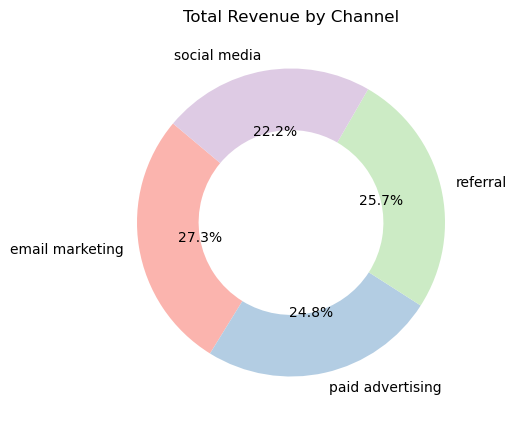

In [32]:
colors = plt.cm.Pastel1(range(len(revenue_by_channel)))

plt.figure(figsize=(8, 5))
plt.pie(revenue_by_channel['revenue'], 
        labels=revenue_by_channel['channel'], 
        autopct='%1.1f%%', 
        startangle=140, 
        colors=colors, 
        wedgeprops=dict(width=0.4))

plt.title('Total Revenue by Channel')
plt.show()

# Renturn on Investment

In [33]:
data['roi'] = data['revenue'] / data['cost']
roi_by_channel = data.groupby('channel')['roi'].mean().reset_index()
roi_by_channel

,channel,roi
0,email marketing,538.617455
1,paid advertising,92.832615
2,referral,330.691213
3,social media,278.962290


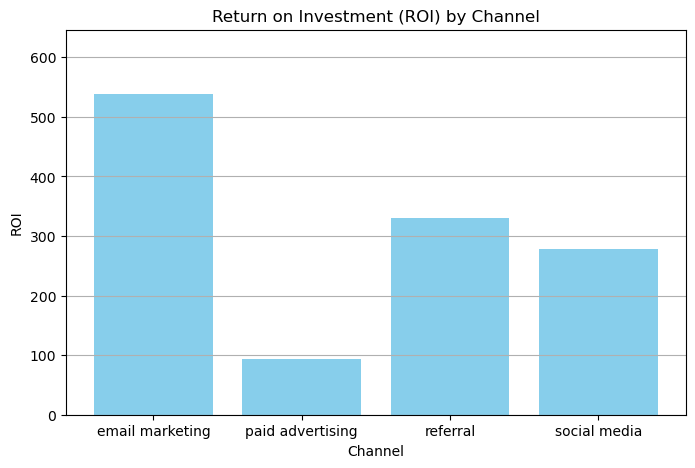

In [35]:
plt.figure(figsize=(8, 5))
plt.bar(roi_by_channel['channel'], roi_by_channel['roi'], color='skyblue')
plt.title('Return on Investment (ROI) by Channel')
plt.xlabel('Channel')
plt.ylabel('ROI')
plt.ylim(0, max(roi_by_channel['roi']) * 1.2)  # Extend y-axis slightly above the max ROI
plt.grid(axis='y')
plt.show()

# Customer Lifetime Value

In [36]:
data['cltv'] = (data['revenue'] - data['cost']) * data['conversion_rate'] / data['cost']

channel_cltv = data.groupby('channel')['cltv'].mean().reset_index()
channel_cltv

,channel,cltv
0,email marketing,23.559595
1,paid advertising,1.500682
2,referral,40.599817
3,social media,46.584325


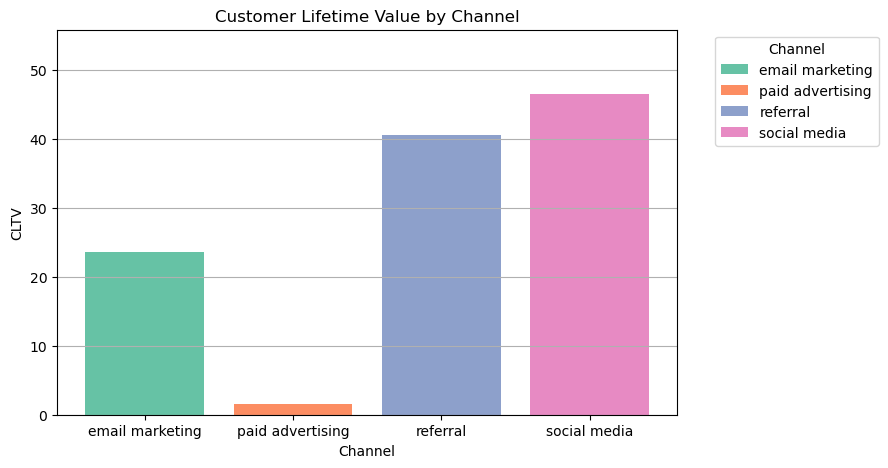

In [41]:
palette = sns.color_palette("Set2", len(channel_cltv))

plt.figure(figsize=(8, 5))
bars = plt.bar(channel_cltv['channel'], channel_cltv['cltv'], color=palette)
plt.title('Customer Lifetime Value by Channel')
plt.xlabel('Channel')
plt.ylabel('CLTV')
plt.ylim(0, max(channel_cltv['cltv']) * 1.2)  # Extend y-axis slightly above the max CLTV
plt.grid(axis='y')

plt.legend(bars, channel_cltv['channel'], title="Channel", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

In [37]:
subset = data.loc[data['channel'].isin(['social media', 'referral'])]

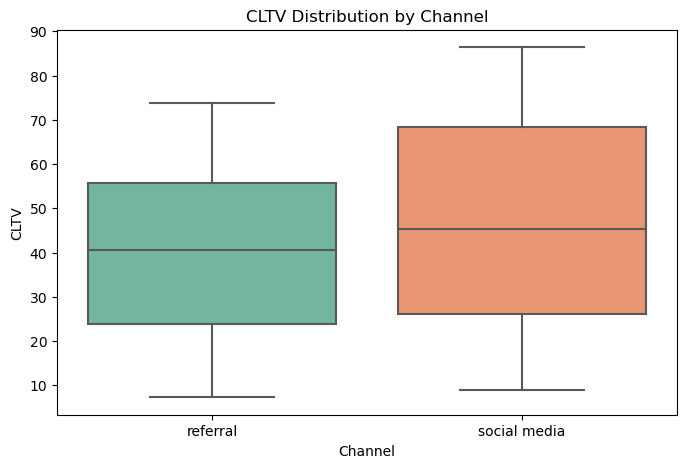

In [43]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='channel', y='cltv', data=subset, palette='Set2')
plt.title('CLTV Distribution by Channel')
plt.xlabel('Channel')
plt.ylabel('CLTV')
plt.show()

In [44]:
# Customer Lifetime Value from the Social Media channel is slightly better than the referral channel.